# The battle of neighborhoods: Need for coffee

## Table of contents
* [Introduction:](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## 1. Introduction

<a id='introduction'></a>

### Problem description

**Coffee** is one of  the most widely consumed beverages in the world. It is more than just a drink: it is a culture, an industry, an art, and a passion. Having a cup of coffee is an everyday  ritual for a lot of people. Cafeterias  and coffee shops have become favorite places for business meetings, romantic rendezvous, and to hang out with friends.
Big cities, especially those districts that are populated with business or office facilities, historical or entertaining areas that attract a lot of tourists, usually, have numerous venues related to serving and selling coffee.



In my final report, I will explore coffee shops of San Francisco, CA, find out how many coffe shops are located in each neighborhood, build maps that represent the quantity and quality of them. Also, i will try to forecast where is the best location in San Francisco to open a new coffee shop. I will use data science powers to generate a few most promissing neighborhoods as best possible locations that can be chosen by stakeholders.

## 2. Data

<a id='data'></a>

### Data description

For the final assignment I will use Foursquare location data, data that we had been using in this course labs, and other datasets from open data sources. For initial analysis I need:
1. **San Francisco neighborhoods data set with coordinates**
2. **Foursquare location data for a specific venue category (coffee)**

San Francisco coordinate: https://geohack.toolforge.org/geohack.php?pagename=San_Francisco&params=37_46_39_N_122_24_59_W_region:US-CA_type:city(805235)

San Francisco neighborhoods data: https://data.sfgov.org/Geographic-Locations-and-Boundaries/SF-Find-Neighborhoods/pty2-tcw4

## 3. Metodology

<a id='methodology'></a>

In this assignment I will explore and analyse 5 most popular neighborhoods of San Francisco, CA from a touristic prospective: 
- Russian Hill
- Marina District
- Fisherman’s Wharf
- Chinatown
- Financial District. 
Our goal is to find out what are the most popular venues and how many of them are coffee shops. The **methodology** of the research is:
1. Upload files that contain San Francisco neighborhood data with their coordinates(.csv) and geojson file to build a map
2. Using Foursquare API, explore the downtown of San Francisco city, find the top 100 closest venues in 1000m radius
3. Using Foursquare API, find specific venues (coffee shops) for Lombard street
4. For each of five districts, find the top 100 closest venues in 1000m radius. Create data frames for all venues and separately for coffee shops and cafes.
5. For each of five districts, build graphics charts to visualise the data.
6. Combine all found coffee shops and cafes into one data set, then build a choropleth map 


## 4. Analysis

<a id='analysis'></a>

For initial analysis let's upload San Francisco Neighborhoods data set and explore the centre of the sity of San Francisco

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline

In [2]:
sf_df = pd.read_csv("https://raw.githubusercontent.com/Ok-sa/Coursera_Capstone/main/SFFind_Neighborhoods.csv")

In [3]:
sf_df.head()

,LINK,the_geom,name
0,"http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...",MULTIPOLYGON (((-122.49345526799993 37.7835181...,Seacliff
1,NaN,MULTIPOLYGON (((-122.48715071499993 37.7837854...,Lake Street
2,http://www.nps.gov/prsf/index.htm,MULTIPOLYGON (((-122.47758017099994 37.8109931...,Presidio National Park
3,NaN,MULTIPOLYGON (((-122.47241052999993 37.7873465...,Presidio Terrace
4,http://www.sfgate.com/neighborhoods/sf/innerri...,MULTIPOLYGON (((-122.47262578999994 37.7863148...,Inner Richmond


In [4]:
sf_df.shape

(117, 3)

In [5]:
sf_df.name.values

array(['Seacliff', 'Lake Street', 'Presidio National Park',
       'Presidio Terrace', 'Inner Richmond', 'Sutro Heights',
       'Lincoln Park / Ft. Miley', 'Outer Richmond', 'Golden Gate Park',
       'Presidio Heights', 'Laurel Heights / Jordan Park',
       'Lone Mountain', 'Anza Vista', 'Cow Hollow', 'Union Street',
       'Nob Hill', 'Marina', 'Telegraph Hill', 'Downtown / Union Square',
       'Tenderloin', 'Civic Center', 'Hayes Valley', 'Alamo Square',
       'Panhandle', 'Haight Ashbury', 'Lower Haight', 'Mint Hill',
       'Duboce Triangle', 'Cole Valley', 'Rincon Hill', 'South Beach',
       'South of Market', 'Showplace Square', 'Mission Bay',
       'Yerba Buena Island', 'Treasure Island', 'Mission Dolores',
       'Castro', 'Outer Sunset', 'Parkside', 'Stonestown', 'Parkmerced',
       'Lakeshore', 'Golden Gate Heights', 'Forest Hill', 'West Portal',
       'Clarendon Heights', 'Midtown Terrace', 'Laguna Honda',
       'Lower Nob Hill', 'Upper Market', 'Dolores Heights', 

In [6]:
#import numpy as np # library to handle data in a vectorized manner

#import pandas as pd # library for data analsysis
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#from geopy.geocoders import Nominatim

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
#import matplotlib.cm as cm
#import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         240 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages will be UPDATED:

  certifi                          2020.12.5-py36h5fab9bb_0 --> 2020.12.5-py36h5fab9bb_1



geopy-2.1.0          | 64 KB     

Use the Foursquare API to retrieve the top 100 venues in 1000 radius around the point that determined by latitude and longitude coordinates

In [7]:
# @hidden_cell
#
CLIENT_ID = '2JXW31YXC1QW0UQJ23GS5PMECSGTXEM3EZC1AESQY02XTCMH' # your Foursquare ID
CLIENT_SECRET = 'YYOHDYPO21IWB5MTINH31K1HZHZKXXHU2ABKDPWTAGX3XPMD' # your Foursquare Secret
VERSION = '20210131' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2JXW31YXC1QW0UQJ23GS5PMECSGTXEM3EZC1AESQY02XTCMH
CLIENT_SECRET:YYOHDYPO21IWB5MTINH31K1HZHZKXXHU2ABKDPWTAGX3XPMD


In [8]:
sf_lat = 37.7775
sf_lon = -122.416389
LIMIT = 100
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,
    sf_lat,
    sf_lon,
    radius, 
    LIMIT)
url



'https://api.foursquare.com/v2/venues/explore?&client_id=2JXW31YXC1QW0UQJ23GS5PMECSGTXEM3EZC1AESQY02XTCMH&client_secret=YYOHDYPO21IWB5MTINH31K1HZHZKXXHU2ABKDPWTAGX3XPMD&v=20210131&ll=37.7775,-122.416389&radius=1000&limit=100'

In [9]:
results = requests.get(url).json()
#results

Let's extract the information about names, categories and coordinates of the venues found and put them into a Data Frame

In [10]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [11]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Blue Bottle Coffee,Coffee Shop,37.776286,-122.416867
1,Orpheum Theatre,Theater,37.779315,-122.414790
2,Fitness SF,Gym / Fitness Center,37.776161,-122.416413
3,Ananda Fuara,Vegetarian / Vegan Restaurant,37.777693,-122.416353
4,Coffee Cultures,Coffee Shop,37.776089,-122.414717


Since our objective is to explore venues that serve and sell coffee, let's group our data set by categories to see how many of them are Coffee shops or Cafe. 

In [12]:
#sort values by categories
nearby_venues.sort_values(by=['categories'])

,name,categories,lat,lng
5,Asian Art Museum,Art Museum,37.780178,-122.416505
94,Wise Sons Bagel & Coffee,Bagel Shop,37.777235,-122.424831
29,Arsicault Bakery,Bakery,37.780789,-122.413433
36,The Cake Gallery,Bakery,37.773997,-122.411882
87,Hayes Valley Bakeworks,Bakery,37.778631,-122.423197
...,...,...,...,...
61,San Francisco Wine & Cheese,Wine Bar,37.774782,-122.422852
62,Hotel Biron,Wine Bar,37.773504,-122.422110
68,Birba,Wine Bar,37.777750,-122.424159
46,Arlequin Wine Merchant,Wine Shop,37.777061,-122.422605


In [13]:
print('The dataframe has {} categories among {} venues.'.format(
        len(nearby_venues['categories'].unique()),
        nearby_venues.shape[0]
    )
)

The dataframe has 61 categories among 100 venues.


In [14]:
nearby_venues.groupby('categories').count()

,name,lat,lng
categories,,,
Art Museum,1,1,1
Bagel Shop,1,1,1
Bakery,3,3,3
Beer Bar,4,4,4
Beer Garden,1,1,1
...,...,...,...
Vegetarian / Vegan Restaurant,1,1,1
Vietnamese Restaurant,1,1,1
Wine Bar,4,4,4


In [15]:
nearby_venues_counts = nearby_venues['categories'].value_counts().to_frame()

In [16]:
nearby_venues_counts

,categories
Coffee Shop,10
Dance Studio,4
Beer Bar,4
Wine Bar,4
Theater,4
...,...
Rock Club,1
Gym / Fitness Center,1
Jazz Club,1
Furniture / Home Store,1


As we can see the largest number of venues of one specific categories are Coffee Shops. Let's visualize the nearby_venues_counts data to see coffe shops number as well as other categories

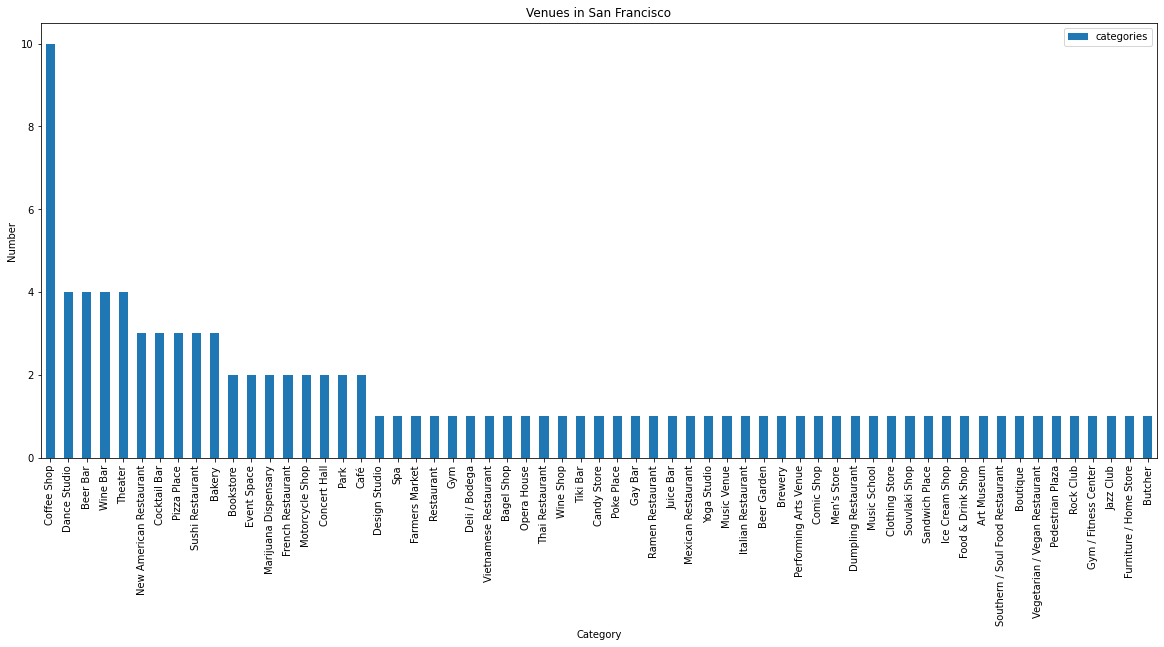

In [17]:
#count, bin_edges = np.histogram(nearby_venues_coffee_counts['number'])
nearby_venues_counts.plot(kind = 'bar', figsize=(20, 8))
plt.title('Venues in San Francisco')
plt.ylabel('Number')
plt.xlabel('Category')
plt.show()

In our data set we can spot such category as **Café**. A café is a type of restaurant which typically serves coffee and tea, in addition to light refreshments such as baked goods or snacks. The term "café" comes from the French word meaning "coffee". 

In [18]:
nearby_venues.categories.replace(['Café'], ['Coffee Shop'], inplace=True)

In [19]:
nearby_venues.head()

,name,categories,lat,lng
0,Blue Bottle Coffee,Coffee Shop,37.776286,-122.416867
1,Orpheum Theatre,Theater,37.779315,-122.414790
2,Fitness SF,Gym / Fitness Center,37.776161,-122.416413
3,Ananda Fuara,Vegetarian / Vegan Restaurant,37.777693,-122.416353
4,Coffee Cultures,Coffee Shop,37.776089,-122.414717


In [20]:
nearby_venues.groupby('categories').count()

,name,lat,lng
categories,,,
Art Museum,1,1,1
Bagel Shop,1,1,1
Bakery,3,3,3
Beer Bar,4,4,4
Beer Garden,1,1,1
Bookstore,2,2,2
Boutique,1,1,1
Brewery,1,1,1
Butcher,1,1,1


In [21]:
nearby_venues.categories.replace(['Coffe Shop'], ['Coffee Shop'], inplace=True)

In [22]:
nearby_venues.groupby('categories').count()

,name,lat,lng
categories,,,
Art Museum,1,1,1
Bagel Shop,1,1,1
Bakery,3,3,3
Beer Bar,4,4,4
Beer Garden,1,1,1
Bookstore,2,2,2
Boutique,1,1,1
Brewery,1,1,1
Butcher,1,1,1


In [23]:
nearby_venues_counts1 = nearby_venues['categories'].value_counts().to_frame()

In [24]:
nearby_venues_counts1

,categories
Coffee Shop,12
Dance Studio,4
Beer Bar,4
Wine Bar,4
Theater,4
New American Restaurant,3
Sushi Restaurant,3
Bakery,3
Cocktail Bar,3
Pizza Place,3


Let's visualize our new data set

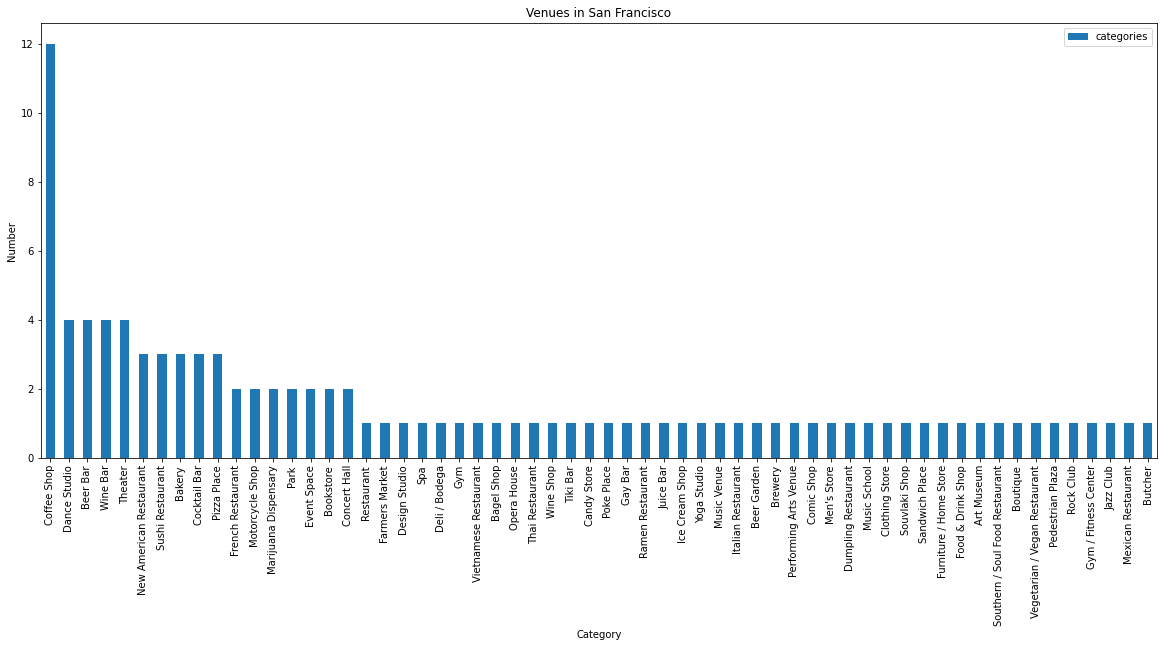

In [25]:
#count, bin_edges = np.histogram(nearby_venues_coffee_counts['number'])
nearby_venues_counts1.plot(kind = 'bar', figsize=(20, 8))
plt.title('Venues in San Francisco')
plt.ylabel('Number')
plt.xlabel('Category')
plt.show()

The difference between the number of coffee shops and other categories became even more significant!

Let's visualize our coffee shops on a map

In [26]:
#create a new data frame for coffee shops
coffee = nearby_venues.loc[(nearby_venues.categories == "Coffee Shop")]
coffee

,name,categories,lat,lng
0,Blue Bottle Coffee,Coffee Shop,37.776286,-122.416867
4,Coffee Cultures,Coffee Shop,37.776089,-122.414717
21,Philz Coffee,Coffee Shop,37.781266,-122.416901
22,Bi-Rite Cafe,Coffee Shop,37.778779,-122.417164
32,George and Lennie,Coffee Shop,37.781701,-122.415213
42,Blue Bottle Coffee,Coffee Shop,37.776430,-122.423224
44,Saint Frank,Coffee Shop,37.779519,-122.410432
55,20th Century Cafe,Coffee Shop,37.774903,-122.422434
65,Ritual Coffee Roasters,Coffee Shop,37.776476,-122.424281
67,Sightglass Coffee,Coffee Shop,37.777001,-122.408519


In [27]:
latitude = 37.7775
longitude = -122.416389
#longitude
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='San Francisco',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(coffee.lat, coffee.lng, coffee.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='brown',
        popup=label,
        fill = True,
        fill_color='brown',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

Now we know that coffee shops are most common category of venues in the San Francisco Downtown. Lets use Foursquare service for a specific venue category (Coffee Shop, of course) in one of most touristic areas in San Francisco, Lombard Street (aka Crooked street). We will define a query to search for coffee that is within 500 metres.

In [28]:
search_query = 'Coffee'
radius = 500
print(search_query + ' .... OK!')

Coffee .... OK!


In [30]:
#latitude = 37.801944
#longitude = -122.418889
#https://foursquare.com/oauth2/authenticate?client_id=2JXW31YXC1QW0UQJ23GS5PMECSGTXEM3EZC1AESQY02XTCMH&response_type=code&redirect_uri=https://www.google.com

In [31]:
latitude = 37.801944
longitude = -122.418889
ACCESS_TOKEN = "UA1EFH1OH1OZARIXFS42QICQFNDDKQ54P33XD2KU1R5NGQDB"

In [32]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=2JXW31YXC1QW0UQJ23GS5PMECSGTXEM3EZC1AESQY02XTCMH&client_secret=YYOHDYPO21IWB5MTINH31K1HZHZKXXHU2ABKDPWTAGX3XPMD&ll=37.801944,-122.418889&oauth_token=UA1EFH1OH1OZARIXFS42QICQFNDDKQ54P33XD2KU1R5NGQDB&v=20210131&query=Coffee&radius=500&limit=100'

In [33]:
results_coffee = requests.get(url).json()
results_coffee

{'meta': {'code': 200, 'requestId': '60178e5096e57366956f5de3'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '50a6999590e7783c56a9945c',
    'name': 'Beacon Coffee & Pantry',
    'location': {'address': '805 Columbus Ave',
     'lat': 37.802292992101854,
     'lng': -122.41321000435767,
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.802292992101854,
       'lng': -122.41321000435767},
      {'label': 'entrance', 'lat': 37.802264, 'lng': -122.413232}],
     'distance': 501,
     'postalCode': '94133',
     'cc': 'US',
     'city': 'San Francisco',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['805 Columbus Ave', 'San Francisco, CA 94133']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
 

In [34]:
# assign relevant part of JSON to venues
venues = results_coffee['response']['venues']

# tranform venues into a dataframe
lombard_coffee = json_normalize(venues)
lombard_coffee.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet
0,50a6999590e7783c56a9945c,Beacon Coffee & Pantry,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1612156496,False,805 Columbus Ave,37.802293,-122.413210,"[{'label': 'display', 'lat': 37.80229299210185...",501,94133,US,San Francisco,CA,United States,"[805 Columbus Ave, San Francisco, CA 94133]",NaN
1,4f9bff26e4b04f3d08fea156,Coffee Shop at Enoteca Musto,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1612156496,False,NaN,37.806255,-122.416235,"[{'label': 'display', 'lat': 37.806255, 'lng':...",533,94133,US,San Francisco,CA,United States,"[San Francisco, CA 94133]",NaN
2,519bfc0f498efb3ecbd8d442,Eva's Coffee,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1612156496,False,1445 Lombard St,37.800892,-122.425348,"[{'label': 'display', 'lat': 37.800892, 'lng':...",580,94123,US,San Francisco,CA,United States,"[1445 Lombard St (Van Ness), San Francisco, CA...",Van Ness
3,52617140498ec4929863ea86,Saint Frank,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1612156496,False,2340 Polk St,37.798461,-122.422249,"[{'label': 'display', 'lat': 37.79846064964029...",487,94109,US,San Francisco,CA,United States,"[2340 Polk St (btwn Union & Green), San Franci...",btwn Union & Green


In [35]:
lombard_coffee.shape

(4, 17)

Just four coffee shops! Not so much...

Let's explor five most touristic heighbourhoods of San Francisco according to TripAdvisor
https://www.tripadvisor.com/Attractions-g60713-Activities-c47-t34-San_Francisco_California.html
GoCity https://gocity.com/san-francisco/en-us/blog/san-francisco-neighborhoods and
SFTravel https://www.sftravel.com/neighborhoods
1. Russian Hill
2. Marina
3. Chinatown
4. Finansial District
5. North Beach

### 4.1. Russian Hill

In [36]:
address = 'Russian Hill, San Francisco, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Russian Hill coordinate:', latitude, longitude)

Russian Hill coordinate: 37.8000729 -122.4170942


In [37]:
rh_lat = 37.8000729
rh_lon = -122.4170942
LIMIT = 100
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,
    rh_lat,
    rh_lon,
    radius, 
    LIMIT)
url



'https://api.foursquare.com/v2/venues/explore?&client_id=2JXW31YXC1QW0UQJ23GS5PMECSGTXEM3EZC1AESQY02XTCMH&client_secret=YYOHDYPO21IWB5MTINH31K1HZHZKXXHU2ABKDPWTAGX3XPMD&v=20210131&ll=37.8000729,-122.4170942&radius=1000&limit=100'

In [38]:
results_rh = requests.get(url).json()
#results_rh

In [39]:
venues = results_rh['response']['groups'][0]['items']
    
nearby_venues_rh = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_rh =nearby_venues_rh.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_rh['venue.categories'] = nearby_venues_rh.apply(get_category_type, axis=1)

# clean columns
nearby_venues_rh.columns = [col.split(".")[-1] for col in nearby_venues_rh.columns]

nearby_venues_rh.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Union Larder,Wine Bar,37.798904,-122.419049
1,Za Pizza,Pizza Place,37.798571,-122.418955
2,Lombard Street,Monument / Landmark,37.802121,-122.418790
3,Swensen's Ice Cream,Ice Cream Shop,37.799084,-122.419181
4,Okoze Sushi,Sushi Restaurant,37.799191,-122.419266


In [40]:
nearby_venues_rh.shape

(100, 4)

In [41]:
#create a new data frame for coffee shops
coffee_rh = nearby_venues_rh.loc[(nearby_venues_rh.categories == "Coffee Shop")|(nearby_venues_rh.categories == "Café")]
coffee_rh

,name,categories,lat,lng
16,Saint Frank,Coffee Shop,37.798461,-122.422249
30,Beacon Coffee & Pantry,Coffee Shop,37.802293,-122.413210
32,Bodega,Café,37.801162,-122.411410
34,Philz Coffee,Coffee Shop,37.797424,-122.421837
44,Mario's Bohemian Cigar Store Cafe,Café,37.800391,-122.409876
85,The Coffee Movement,Coffee Shop,37.794687,-122.410299
88,Fueling Station,Café,37.799238,-122.422388


In [42]:
coffee_rh.shape

(7, 4)

Let's visualize numbers of vennues at Russian Hill

In [43]:
nearby_venues_rh.categories.replace(['Café'], ['Coffee Shop'], inplace=True)

In [44]:
nearby_venues_rh.head()

,name,categories,lat,lng
0,Union Larder,Wine Bar,37.798904,-122.419049
1,Za Pizza,Pizza Place,37.798571,-122.418955
2,Lombard Street,Monument / Landmark,37.802121,-122.418790
3,Swensen's Ice Cream,Ice Cream Shop,37.799084,-122.419181
4,Okoze Sushi,Sushi Restaurant,37.799191,-122.419266


In [45]:
nearby_venues_rh_counts = nearby_venues_rh['categories'].value_counts().to_frame()

In [46]:
nearby_venues_rh_counts

,categories
Coffee Shop,7
Italian Restaurant,6
Pizza Place,5
Bar,3
Park,3
...,...
Art Museum,1
Mexican Restaurant,1
Smoothie Shop,1
Garden,1


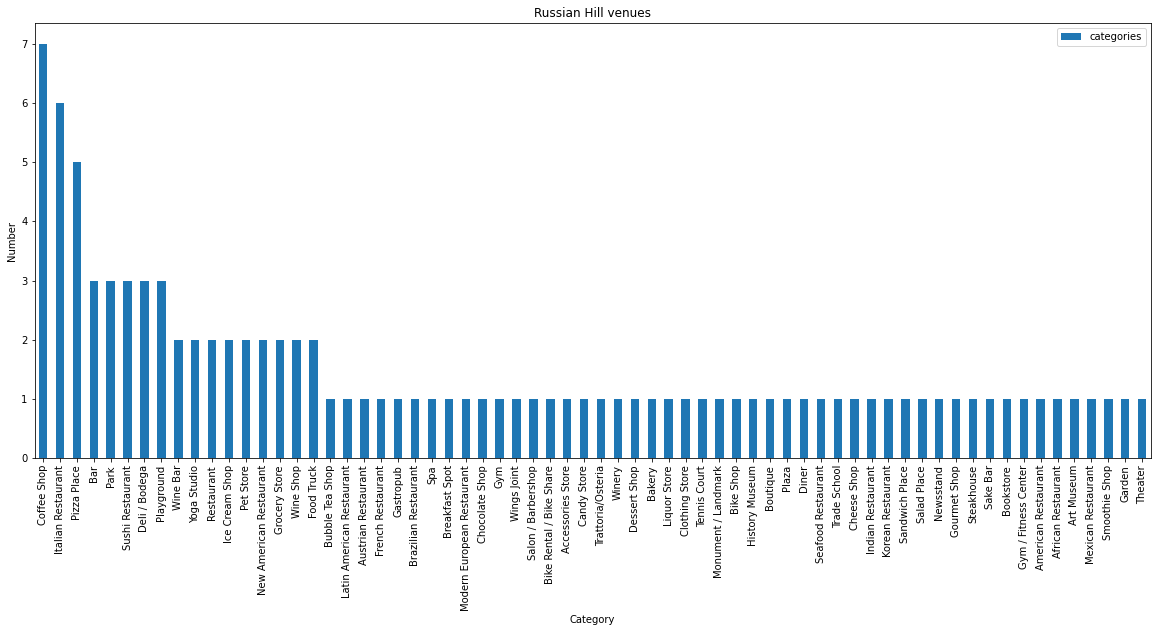

In [47]:
nearby_venues_rh_counts.plot(kind = 'bar', figsize=(20, 8))
plt.title('Russian Hill venues')
plt.ylabel('Number')
plt.xlabel('Category')
plt.show()

As we can see, Coffe Shops are preoccupied, but Italian Restorants are at the second place

Create a separate data frame for the coffee shops in this location

In [48]:
rh_coffee = nearby_venues_rh.loc[(nearby_venues_rh.categories == "Coffee Shop")]
rh_coffee["neighborhood"]="Russian Hill"
rh_coffee

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,categories,lat,lng,neighborhood
16,Saint Frank,Coffee Shop,37.798461,-122.422249,Russian Hill
30,Beacon Coffee & Pantry,Coffee Shop,37.802293,-122.413210,Russian Hill
32,Bodega,Coffee Shop,37.801162,-122.411410,Russian Hill
34,Philz Coffee,Coffee Shop,37.797424,-122.421837,Russian Hill
44,Mario's Bohemian Cigar Store Cafe,Coffee Shop,37.800391,-122.409876,Russian Hill
85,The Coffee Movement,Coffee Shop,37.794687,-122.410299,Russian Hill
88,Fueling Station,Coffee Shop,37.799238,-122.422388,Russian Hill


### 4.2. Fisherman's Wharf

In [49]:
address = 'Fishermans Wharf, San Francisco, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Fishermans Wharf coordinate:', latitude, longitude)

Fishermans Wharf coordinate: 37.8091669 -122.4165994


In [50]:
fw_lat = 37.8091669
fw_lon = -122.4165994
LIMIT = 100
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,
    fw_lat,
    fw_lon,
    radius, 
    LIMIT)
url



'https://api.foursquare.com/v2/venues/explore?&client_id=2JXW31YXC1QW0UQJ23GS5PMECSGTXEM3EZC1AESQY02XTCMH&client_secret=YYOHDYPO21IWB5MTINH31K1HZHZKXXHU2ABKDPWTAGX3XPMD&v=20210131&ll=37.8091669,-122.4165994&radius=1000&limit=100'

In [51]:
results_fw = requests.get(url).json()
#results_fw

In [52]:
venues = results_fw['response']['groups'][0]['items']
    
nearby_venues_fw = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_fw =nearby_venues_fw.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_fw['venue.categories'] = nearby_venues_fw.apply(get_category_type, axis=1)

# clean columns
nearby_venues_fw.columns = [col.split(".")[-1] for col in nearby_venues_fw.columns]

nearby_venues_fw.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Musée Mécanique,Museum,37.809333,-122.415952
1,Boudin Bakery Café Baker's Hall,Bakery,37.808453,-122.415106
2,The Baked Bear,Ice Cream Shop,37.807447,-122.417310
3,Carmel Pizza Company,Pizza Place,37.807532,-122.417287
4,GoCar GPS-Guided Tours,Tour Provider,37.807125,-122.416165


In [53]:
nearby_venues_fw_counts = nearby_venues_fw['categories'].value_counts().to_frame()

In [54]:
nearby_venues_fw_counts

,categories
Seafood Restaurant,6
Ice Cream Shop,5
Chocolate Shop,4
Coffee Shop,4
Park,3
...,...
Art Museum,1
Toy / Game Store,1
Plaza,1
Mexican Restaurant,1


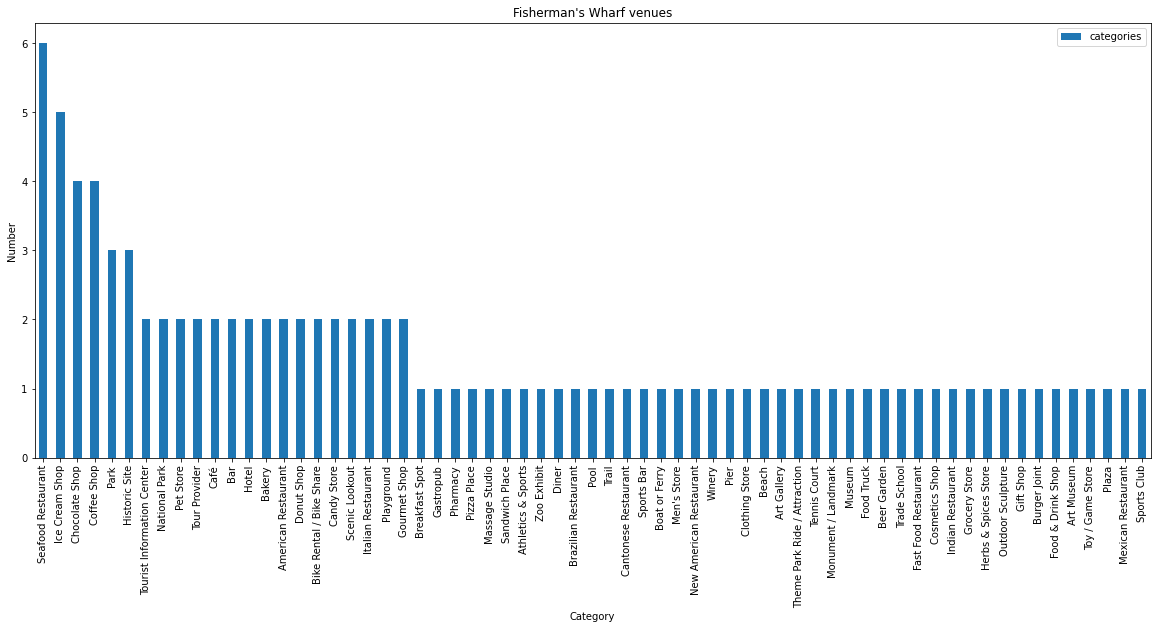

In [55]:
nearby_venues_fw_counts.plot(kind = 'bar', figsize=(20, 8))
plt.title("Fisherman's Wharf venues")
plt.ylabel('Number')
plt.xlabel('Category')
plt.show()

As we can see, there are equal numbers of Seafood restaurants, Ice Cream Shops and Coffee Shops at the Fisherman's Wharf. However, if we consider Cafes as Coffee Shops, coffee shops win.

In [56]:
nearby_venues_fw.categories.replace(['Café'], ['Coffee Shop'], inplace=True)

In [57]:
nearby_venues_fw_counts1 = nearby_venues_fw['categories'].value_counts().to_frame()

In [58]:
nearby_venues_fw_counts1

,categories
Seafood Restaurant,6
Coffee Shop,6
Ice Cream Shop,5
Chocolate Shop,4
Historic Site,3
...,...
Art Museum,1
Toy / Game Store,1
Plaza,1
Mexican Restaurant,1


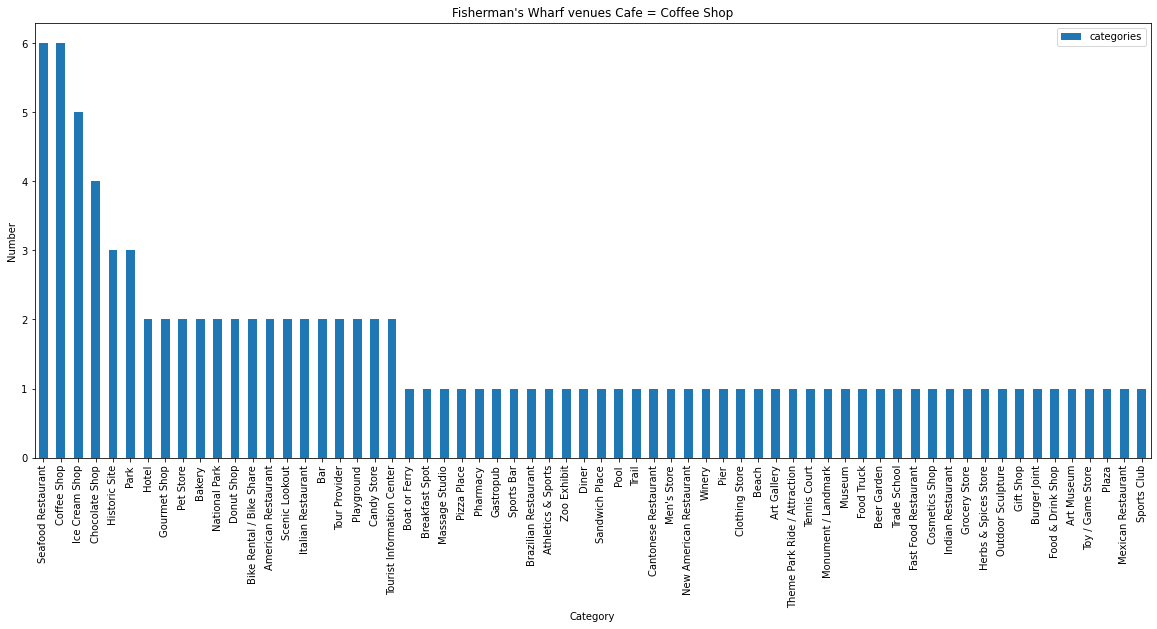

In [59]:
nearby_venues_fw_counts1.plot(kind = 'bar', figsize=(20, 8))
plt.title("Fisherman's Wharf venues Cafe = Coffee Shop")
plt.ylabel('Number')
plt.xlabel('Category')
plt.show()

Create a separate data frame for the coffee shops in this location

In [60]:
fw_coffee = nearby_venues_fw.loc[(nearby_venues_fw.categories == "Coffee Shop")]
fw_coffee["neighborhood"]="Fishermans Wharf"
fw_coffee

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,categories,lat,lng,neighborhood
20,Starbucks,Coffee Shop,37.808474,-122.413017,Fishermans Wharf
74,DeLise,Coffee Shop,37.805772,-122.412708,Fishermans Wharf
75,Beacon Coffee & Pantry,Coffee Shop,37.802293,-122.413210,Fishermans Wharf
85,Bodega,Coffee Shop,37.801162,-122.411410,Fishermans Wharf
87,The Crêpe Café,Coffee Shop,37.809700,-122.410323,Fishermans Wharf
95,Cafe Francisco,Coffee Shop,37.804861,-122.411890,Fishermans Wharf


### 3.3. Marina District

In [61]:
address = 'Marina District, San Francisco, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Marina coordinate:', latitude, longitude)

Marina coordinate: 37.8029843 -122.4374715


In [62]:
#37.803, -122.436

In [63]:
m_lat = 37.8029843
m_lon = -122.4374715
LIMIT = 100
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,
    m_lat,
    m_lon,
    radius, 
    LIMIT)
url




'https://api.foursquare.com/v2/venues/explore?&client_id=2JXW31YXC1QW0UQJ23GS5PMECSGTXEM3EZC1AESQY02XTCMH&client_secret=YYOHDYPO21IWB5MTINH31K1HZHZKXXHU2ABKDPWTAGX3XPMD&v=20210131&ll=37.8029843,-122.4374715&radius=1000&limit=100'

In [64]:
results_m = requests.get(url).json()
#results_m

In [65]:
venues = results_m['response']['groups'][0]['items']
    
nearby_venues_m = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_m =nearby_venues_m.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_m['venue.categories'] = nearby_venues_m.apply(get_category_type, axis=1)

# clean columns
nearby_venues_m.columns = [col.split(".")[-1] for col in nearby_venues_m.columns]

nearby_venues_m.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Paper Source,Arts & Crafts Store,37.800754,-122.437351
1,SusieCakes,Cupcake Shop,37.800546,-122.438142
2,Lucca's Delicatessen,Deli / Bodega,37.800583,-122.438362
3,Blue Barn Gourmet,Salad Place,37.800328,-122.437516
4,California Wine Merchant,Wine Bar,37.800548,-122.438207


In [66]:
nearby_venues_m.shape

(100, 4)

Let's combine Cafes and Coffee Shops at Marina and sort the result data frame by categories

In [67]:
nearby_venues_m.categories.replace(['Café'], ['Coffee Shop'], inplace=True)

In [68]:
nearby_venues_m_counts = nearby_venues_m['categories'].value_counts().to_frame()

In [69]:
nearby_venues_m_counts

,categories
Gym / Fitness Center,6
Park,5
Wine Bar,3
French Restaurant,3
Sandwich Place,3
...,...
Track,1
Field,1
Electronics Store,1
Burmese Restaurant,1


Build a bar chart to visualize the venues by categories

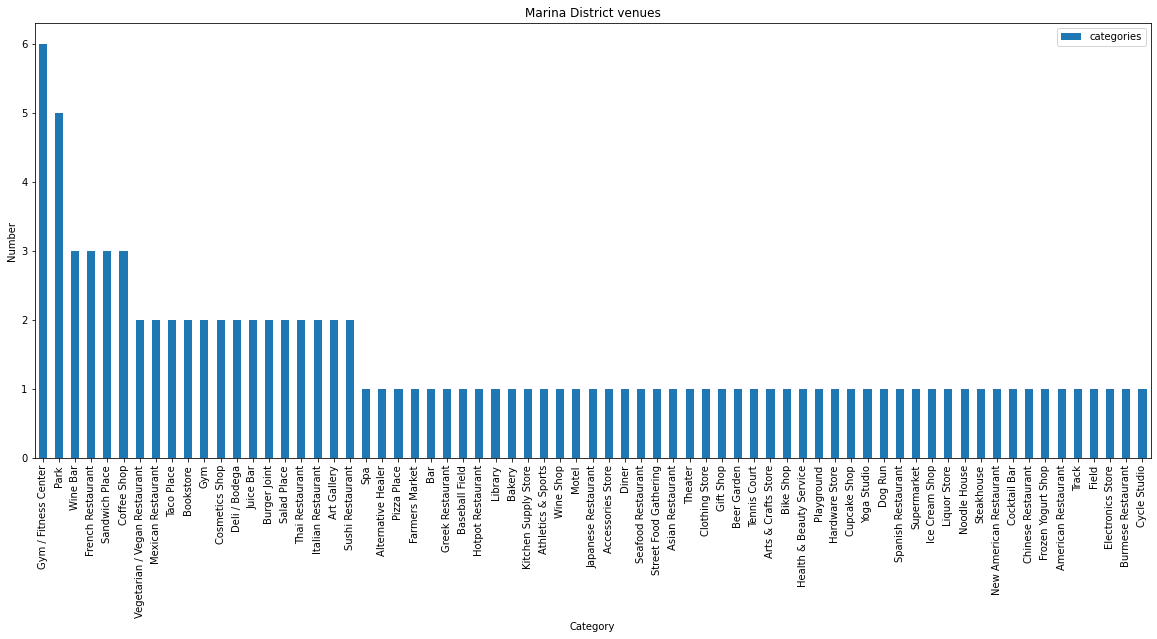

In [70]:
nearby_venues_m_counts.plot(kind = 'bar', figsize=(20, 8))
plt.title("Marina District venues")
plt.ylabel('Number')
plt.xlabel('Category')
plt.show()

We have a lot of Gim/Fitness Centers, but only three of Coffee Shops at Marina District

Create a separate data frame for the coffee shops in this location

In [71]:
m_coffee = nearby_venues_m.loc[(nearby_venues_m.categories == "Coffee Shop")]
m_coffee["neighborhood"]="Marina"
m_coffee

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,categories,lat,lng,neighborhood
28,Marina Green Philz Truck,Coffee Shop,37.806100,-122.442136,Marina
33,Equator Coffees & Teas,Coffee Shop,37.805344,-122.431904,Marina
61,Wrecking Ball Coffee Roasters,Coffee Shop,37.796875,-122.436679,Marina


### 4.4. Chinatown

In [72]:
address = 'Chinatown, San Francisco, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Chinatown coordinate:', latitude, longitude)

Chinatown coordinate: 37.7940875 -122.40717108035773


In [73]:
#37.794167, -122.406944

In [74]:
cht_lat = 37.7940875
cht_lon = -122.40717108035773
LIMIT = 100
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,
    cht_lat,
    cht_lon,
    radius, 
    LIMIT)
url



'https://api.foursquare.com/v2/venues/explore?&client_id=2JXW31YXC1QW0UQJ23GS5PMECSGTXEM3EZC1AESQY02XTCMH&client_secret=YYOHDYPO21IWB5MTINH31K1HZHZKXXHU2ABKDPWTAGX3XPMD&v=20210131&ll=37.7940875,-122.40717108035773&radius=1000&limit=100'

In [75]:
results_cht = requests.get(url).json()
#results_cht

In [76]:
venues = results_cht['response']['groups'][0]['items']
    
nearby_venues_cht = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_cht =nearby_venues_cht.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_cht['venue.categories'] = nearby_venues_cht.apply(get_category_type, axis=1)

# clean columns
nearby_venues_cht.columns = [col.split(".")[-1] for col in nearby_venues_cht.columns]

nearby_venues_cht.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Blue Bottle Coffee,Coffee Shop,37.792771,-122.404833
1,Yi Fang Taiwan Fruit Tea,Bubble Tea Shop,37.795038,-122.407614
2,The Coffee Movement,Coffee Shop,37.794687,-122.410299
3,Hinodeya,Ramen Restaurant,37.794656,-122.404544
4,Dragon Papa,Dessert Shop,37.794145,-122.406317


In [77]:
nearby_venues_cht.shape

(100, 4)

Let's combine Cafes and Coffee Shops at Chinatown and sort the result data frame by categories

In [78]:
nearby_venues_cht.categories.replace(['Café'], ['Coffee Shop'], inplace=True)

In [79]:
nearby_venues_cht_counts = nearby_venues_cht['categories'].value_counts().to_frame()

In [80]:
nearby_venues_cht_counts.head()

,categories
Coffee Shop,12
Hotel,5
New American Restaurant,5
Pizza Place,4
Spa,3


Build a bar chart to visualize the venues by categories

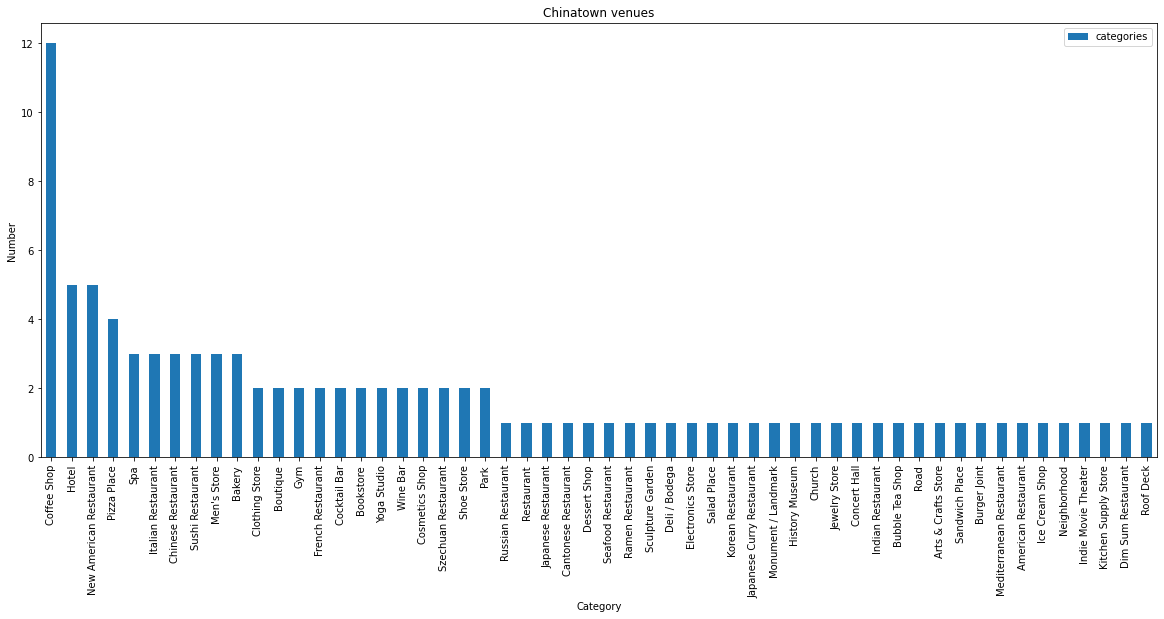

In [81]:
nearby_venues_cht_counts.plot(kind = 'bar', figsize=(20, 8))
plt.title("Chinatown venues")
plt.ylabel('Number')
plt.xlabel('Category')
plt.show()

There are more coffee shops than Chinese restaurant in Chinatown!

Create a separate data frame for the coffee shops in this location

In [82]:
cht_coffee = nearby_venues_cht.loc[(nearby_venues_cht.categories == "Coffee Shop")]
cht_coffee["neighborhood"]="Chinatown"
cht_coffee

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,categories,lat,lng,neighborhood
0,Blue Bottle Coffee,Coffee Shop,37.792771,-122.404833,Chinatown
2,The Coffee Movement,Coffee Shop,37.794687,-122.410299,Chinatown
18,Réveille Coffee Co.,Coffee Shop,37.797204,-122.405589,Chinatown
40,Home,Coffee Shop,37.791312,-122.405899,Chinatown
41,Family Cafe,Coffee Shop,37.798577,-122.407359,Chinatown
54,Cafe Me,Coffee Shop,37.796063,-122.401821,Chinatown
57,Blue Bottle Coffee,Coffee Shop,37.789744,-122.403652,Chinatown
68,Caffe Trieste,Coffee Shop,37.798670,-122.407339,Chinatown
70,Blue Bottle Coffee,Coffee Shop,37.791320,-122.400983,Chinatown
78,Philz Truck,Coffee Shop,37.792805,-122.401050,Chinatown


### 4.5. Financial District

Finally, let's explore the Financial District of San Francisco

In [83]:
address = 'Financial District, San Francisco, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Financial District coordinate:', latitude, longitude)

Financial District coordinate: 37.7936467 -122.3989378


In [84]:
fd_lat = 37.7936467
fd_lon = -122.3989378
LIMIT = 100
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,
    fd_lat,
    fd_lon,
    radius, 
    LIMIT)
url



'https://api.foursquare.com/v2/venues/explore?&client_id=2JXW31YXC1QW0UQJ23GS5PMECSGTXEM3EZC1AESQY02XTCMH&client_secret=YYOHDYPO21IWB5MTINH31K1HZHZKXXHU2ABKDPWTAGX3XPMD&v=20210131&ll=37.7936467,-122.3989378&radius=1000&limit=100'

In [85]:
results_fd = requests.get(url).json()
#results_fd

In [86]:
venues = results_fd['response']['groups'][0]['items']
    
nearby_venues_fd = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_fd =nearby_venues_fd.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_fd['venue.categories'] = nearby_venues_fd.apply(get_category_type, axis=1)

# clean columns
nearby_venues_fd.columns = [col.split(".")[-1] for col in nearby_venues_fd.columns]

nearby_venues_fd.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Embarcadero Center Cinema,Indie Movie Theater,37.794871,-122.399648
1,Wheel House,Gym,37.794481,-122.399970
2,The Bar Method,Gym / Fitness Center,37.794848,-122.396903
3,Homegrown,Sandwich Place,37.793617,-122.400000
4,Oasis Grill,Mediterranean Restaurant,37.794483,-122.396712


In [87]:
nearby_venues_fd.shape

(100, 4)

Let's combine Cafes and Coffee Shops at Chinatown and sort the result data frame by categories

In [88]:
nearby_venues_fd.categories.replace(['Café'], ['Coffee Shop'], inplace=True)

In [89]:
nearby_venues_fd_counts = nearby_venues_fd['categories'].value_counts().to_frame()

In [90]:
nearby_venues_fd_counts.head()

,categories
Coffee Shop,12
New American Restaurant,5
Food Truck,4
Cosmetics Shop,3
Wine Bar,3


Build a bar chart to visualize the venues by categories

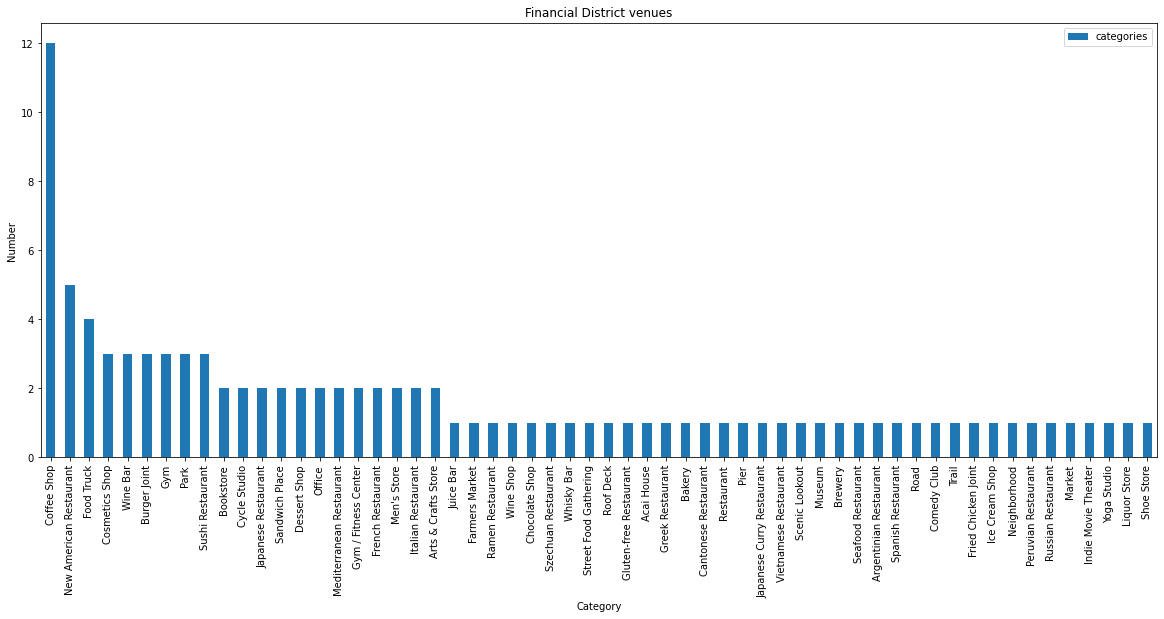

In [91]:
nearby_venues_fd_counts.plot(kind = 'bar', figsize=(20, 8))
plt.title("Financial District venues")
plt.ylabel('Number')
plt.xlabel('Category')
plt.show()

There are a lot of coffee shops at the Financial District in San Francisco. Let's reate a separate data frame for the coffee shops in this location

In [92]:
fd_coffee = nearby_venues_fd.loc[(nearby_venues_fd.categories == "Coffee Shop")]
fd_coffee

,name,categories,lat,lng
8,Philz Coffee,Coffee Shop,37.791651,-122.399157
11,Blue Bottle Coffee,Coffee Shop,37.791320,-122.400983
19,Philz Coffee,Coffee Shop,37.794422,-122.395636
22,Cafe Me,Coffee Shop,37.796063,-122.401821
32,Blue Bottle Coffee Kiosk,Coffee Shop,37.795691,-122.393896
40,Blue Bottle Coffee,Coffee Shop,37.795991,-122.393867
43,Google - Sage Cafe,Coffee Shop,37.792830,-122.394274
47,Blue Bottle Coffee,Coffee Shop,37.792771,-122.404833
74,Philz Coffee,Coffee Shop,37.789121,-122.397052
75,Blue Bottle Coffee,Coffee Shop,37.789744,-122.403652


Place all found coffee shops in one data frame

In [93]:
coffee_result = fd_coffee
coffee_result["neighborhood"] = "Financial District"
coffee_result

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,categories,lat,lng,neighborhood
8,Philz Coffee,Coffee Shop,37.791651,-122.399157,Financial District
11,Blue Bottle Coffee,Coffee Shop,37.791320,-122.400983,Financial District
19,Philz Coffee,Coffee Shop,37.794422,-122.395636,Financial District
22,Cafe Me,Coffee Shop,37.796063,-122.401821,Financial District
32,Blue Bottle Coffee Kiosk,Coffee Shop,37.795691,-122.393896,Financial District
40,Blue Bottle Coffee,Coffee Shop,37.795991,-122.393867,Financial District
43,Google - Sage Cafe,Coffee Shop,37.792830,-122.394274,Financial District
47,Blue Bottle Coffee,Coffee Shop,37.792771,-122.404833,Financial District
74,Philz Coffee,Coffee Shop,37.789121,-122.397052,Financial District
75,Blue Bottle Coffee,Coffee Shop,37.789744,-122.403652,Financial District


In [94]:
coffee_result = coffee_result.append(cht_coffee)
coffee_result = coffee_result.append(m_coffee)
coffee_result = coffee_result.append(fw_coffee)
coffee_result = coffee_result.append(rh_coffee)

In [95]:
coffee_result

,name,categories,lat,lng,neighborhood
8,Philz Coffee,Coffee Shop,37.791651,-122.399157,Financial District
11,Blue Bottle Coffee,Coffee Shop,37.791320,-122.400983,Financial District
19,Philz Coffee,Coffee Shop,37.794422,-122.395636,Financial District
22,Cafe Me,Coffee Shop,37.796063,-122.401821,Financial District
32,Blue Bottle Coffee Kiosk,Coffee Shop,37.795691,-122.393896,Financial District
40,Blue Bottle Coffee,Coffee Shop,37.795991,-122.393867,Financial District
43,Google - Sage Cafe,Coffee Shop,37.792830,-122.394274,Financial District
47,Blue Bottle Coffee,Coffee Shop,37.792771,-122.404833,Financial District
74,Philz Coffee,Coffee Shop,37.789121,-122.397052,Financial District
75,Blue Bottle Coffee,Coffee Shop,37.789744,-122.403652,Financial District


In [96]:
coffee_result.reset_index(inplace = True)
coffee_result

,index,name,categories,lat,lng,neighborhood
0,8,Philz Coffee,Coffee Shop,37.791651,-122.399157,Financial District
1,11,Blue Bottle Coffee,Coffee Shop,37.791320,-122.400983,Financial District
2,19,Philz Coffee,Coffee Shop,37.794422,-122.395636,Financial District
3,22,Cafe Me,Coffee Shop,37.796063,-122.401821,Financial District
4,32,Blue Bottle Coffee Kiosk,Coffee Shop,37.795691,-122.393896,Financial District
5,40,Blue Bottle Coffee,Coffee Shop,37.795991,-122.393867,Financial District
6,43,Google - Sage Cafe,Coffee Shop,37.792830,-122.394274,Financial District
7,47,Blue Bottle Coffee,Coffee Shop,37.792771,-122.404833,Financial District
8,74,Philz Coffee,Coffee Shop,37.789121,-122.397052,Financial District
9,75,Blue Bottle Coffee,Coffee Shop,37.789744,-122.403652,Financial District


In [97]:
coffee_result.dtypes

index             int64
name             object
categories       object
lat             float64
lng             float64
neighborhood     object
dtype: object

In [98]:
coffee_result.head()

,index,name,categories,lat,lng,neighborhood
0,8,Philz Coffee,Coffee Shop,37.791651,-122.399157,Financial District
1,11,Blue Bottle Coffee,Coffee Shop,37.791320,-122.400983,Financial District
2,19,Philz Coffee,Coffee Shop,37.794422,-122.395636,Financial District
3,22,Cafe Me,Coffee Shop,37.796063,-122.401821,Financial District
4,32,Blue Bottle Coffee Kiosk,Coffee Shop,37.795691,-122.393896,Financial District


In [100]:
#just_coffee = coffee_result
#just_coffee = just_coffee.drop(columns = 'neighborhood', inplace = True)
#just_coffee.dtypes

In [102]:
#just_coffee.head()

In [103]:
coffee_result.drop_duplicates

<bound method DataFrame.drop_duplicates of     index                               name   categories        lat  \
0       8                       Philz Coffee  Coffee Shop  37.791651   
1      11                 Blue Bottle Coffee  Coffee Shop  37.791320   
2      19                       Philz Coffee  Coffee Shop  37.794422   
3      22                            Cafe Me  Coffee Shop  37.796063   
4      32           Blue Bottle Coffee Kiosk  Coffee Shop  37.795691   
5      40                 Blue Bottle Coffee  Coffee Shop  37.795991   
6      43                 Google - Sage Cafe  Coffee Shop  37.792830   
7      47                 Blue Bottle Coffee  Coffee Shop  37.792771   
8      74                       Philz Coffee  Coffee Shop  37.789121   
9      75                 Blue Bottle Coffee  Coffee Shop  37.789744   
10     76           Andytown Coffee Roasters  Coffee Shop  37.789752   
11     88                         Coffee Bar  Coffee Shop  37.790508   
12      0            

In [105]:
#just_coffee.shape

In [106]:
coffee_result.shape

(40, 5)

Let's place our coffee shops on a map

In [107]:
latitude = 37.7775
longitude = -122.416389
#longitude
coffee_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='San Francisco',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(coffee_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(coffee_result.lat, coffee_result.lng, coffee_result.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='brown',
        popup=label,
        fill = True,
        fill_color='brown',
        fill_opacity=0.6
    ).add_to(coffee_map)

# display map
coffee_map

In [108]:
coffee_result.head()

,index,name,categories,lat,lng
0,8,Philz Coffee,Coffee Shop,37.791651,-122.399157
1,11,Blue Bottle Coffee,Coffee Shop,37.791320,-122.400983
2,19,Philz Coffee,Coffee Shop,37.794422,-122.395636
3,22,Cafe Me,Coffee Shop,37.796063,-122.401821
4,32,Blue Bottle Coffee Kiosk,Coffee Shop,37.795691,-122.393896


In [109]:
coffe_result1 = fd_coffee.copy()
coffe_result1

,name,categories,lat,lng,neighborhood
8,Philz Coffee,Coffee Shop,37.791651,-122.399157,Financial District
11,Blue Bottle Coffee,Coffee Shop,37.791320,-122.400983,Financial District
19,Philz Coffee,Coffee Shop,37.794422,-122.395636,Financial District
22,Cafe Me,Coffee Shop,37.796063,-122.401821,Financial District
32,Blue Bottle Coffee Kiosk,Coffee Shop,37.795691,-122.393896,Financial District
40,Blue Bottle Coffee,Coffee Shop,37.795991,-122.393867,Financial District
43,Google - Sage Cafe,Coffee Shop,37.792830,-122.394274,Financial District
47,Blue Bottle Coffee,Coffee Shop,37.792771,-122.404833,Financial District
74,Philz Coffee,Coffee Shop,37.789121,-122.397052,Financial District
75,Blue Bottle Coffee,Coffee Shop,37.789744,-122.403652,Financial District


In [110]:
coffe_result1 = coffe_result1.append(cht_coffee)

In [111]:
coffe_result1 = coffe_result1.append(m_coffee)
coffe_result1 = coffe_result1.append(rh_coffee)
coffe_result1 = coffe_result1.append(fw_coffee)

In [112]:
coffe_result1

,name,categories,lat,lng,neighborhood
8,Philz Coffee,Coffee Shop,37.791651,-122.399157,Financial District
11,Blue Bottle Coffee,Coffee Shop,37.791320,-122.400983,Financial District
19,Philz Coffee,Coffee Shop,37.794422,-122.395636,Financial District
22,Cafe Me,Coffee Shop,37.796063,-122.401821,Financial District
32,Blue Bottle Coffee Kiosk,Coffee Shop,37.795691,-122.393896,Financial District
40,Blue Bottle Coffee,Coffee Shop,37.795991,-122.393867,Financial District
43,Google - Sage Cafe,Coffee Shop,37.792830,-122.394274,Financial District
47,Blue Bottle Coffee,Coffee Shop,37.792771,-122.404833,Financial District
74,Philz Coffee,Coffee Shop,37.789121,-122.397052,Financial District
75,Blue Bottle Coffee,Coffee Shop,37.789744,-122.403652,Financial District


In [113]:
coffe_result1.groupby('neighborhood').count()

,name,categories,lat,lng
neighborhood,,,,
Chinatown,12,12,12,12
Financial District,12,12,12,12
Fishermans Wharf,6,6,6,6
Marina,3,3,3,3
Russian Hill,7,7,7,7


In [114]:
nearby_venues_rh_counts = nearby_venues_rh['categories'].value_counts().to_frame()
coffee_counts = coffe_result1['neighborhood'].value_counts().to_frame()


In [115]:
coffee_counts

,neighborhood
Chinatown,12
Financial District,12
Russian Hill,7
Fishermans Wharf,6
Marina,3


In [116]:
coffee_counts.reset_index(inplace=True)

In [117]:
coffee_counts

,index,neighborhood
0,Chinatown,12
1,Financial District,12
2,Russian Hill,7
3,Fishermans Wharf,6
4,Marina,3


In [118]:
coffee_counts.rename(columns = {"index":"neighborhood", "neighborhood":"count"}, inplace = True)

In [119]:
coffee_counts

,neighborhood,count
0,Chinatown,12
1,Financial District,12
2,Russian Hill,7
3,Fishermans Wharf,6
4,Marina,3


Let's build a Choropleth map

In [ ]:
#https://raw.githubusercontent.com/Ok-sa/Coursera_Capstone/main/SF%20Find%20Neighborhoods.geojson

In [121]:
!wget --quiet https://cocl.us/sanfran_geojson -O san-francisco.geojson

gjson = r'https://raw.githubusercontent.com/Ok-sa/Coursera_Capstone/main/SF%20Find%20Neighborhoods.geojson'
latitude = 37.77
longitude = -122.42
sf_map = folium.Map(location=[latitude, longitude], zoom_start = 12)
sf_map.choropleth(
    geo_data = gjson,
    data = coffee_counts,
    columns = ['neighborhood', 'count'],
    key_on ='feature.properties.name',
    fill_color ='YlOrRd',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Coffee Shops in San Francisco',
    reset = True)
sf_map



## 5. Results and Discussion

<a id='results'></a>

Our analysis shows that high demand and everyday coffee consumption, surges to open more coffee  shops. Every good coffee shop eventually obtains its clients among local residents. Tourists make a huge impact on coffee consumption too. It is reasonable to open a coffee shop In places that are located nearby some attractions or places that are popular among tourists. We analyzed five most popular San Francisco neighbourhoods. Coffee shops and Cafes are the most popular categories of venues of four of them.  We find out that Financial District and Chinatown have more coffee shops than Marina and Fisherman’s Wharf. Marina District that has the lowest number of coffee shops would be a good place to open another one.

## 6. Conclusion

<a id='onclusion'></a>

Purpose of this project was to identify San Francisco  areas that are popular among tourists with low numbers of Coffee Shops  in order to aid stakeholders in narrowing down the search for the optimal location for a new Cafe. By placing on a map venues that belong to Coffee Shop or Cafe categories. 
Final decision of optimal restauraIdeas for further rent location will be made by stakeholders based on specific characteristics of the  location, taking into consideration additional factors that could make impact. 
Ideas for further research in the area:
- tourism
- housing and employment
- criminal situation

